In [1]:
from data_generator import FXDatasetGenerator
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import seaborn as sns

# Set up matplotlib for better notebook display
#%matplotlib inline
#plt.style.use('seaborn')

In [2]:
# Create dataset generator with custom parameters
generator = FXDatasetGenerator(
    start_date="2023-01-01",
    end_date="2023-12-31",
    n_arms=5,  # Number of trading strategies
    new_arm_day=180,  # Introduce new strategy after 180 days
    regime_change_days=[90, 240],  # Market regime changes
    time_of_day_categories=["morning", "midday", "afternoon", "pre-close"]
)

print("Generator initialized successfully!")

Generator initialized successfully!


In [3]:
# Generate the dataset
print("Generating FX trading dataset...")
dataset = generator.generate_dataset(contexts_per_day=50)

# Save the dataset to JSON
with open("fx_trading_dataset.json", "w") as f:
    json.dump(dataset, f, indent=2)

# Save volatility series to CSV
generator.save_volatility_series("volatility_series.csv")

print("\nDataset generation complete!")
print(f"Total contexts generated: {len(dataset)}")

Generating FX trading dataset...

Dataset generation complete!
Total contexts generated: 18250


<Figure size 1500x1000 with 0 Axes>

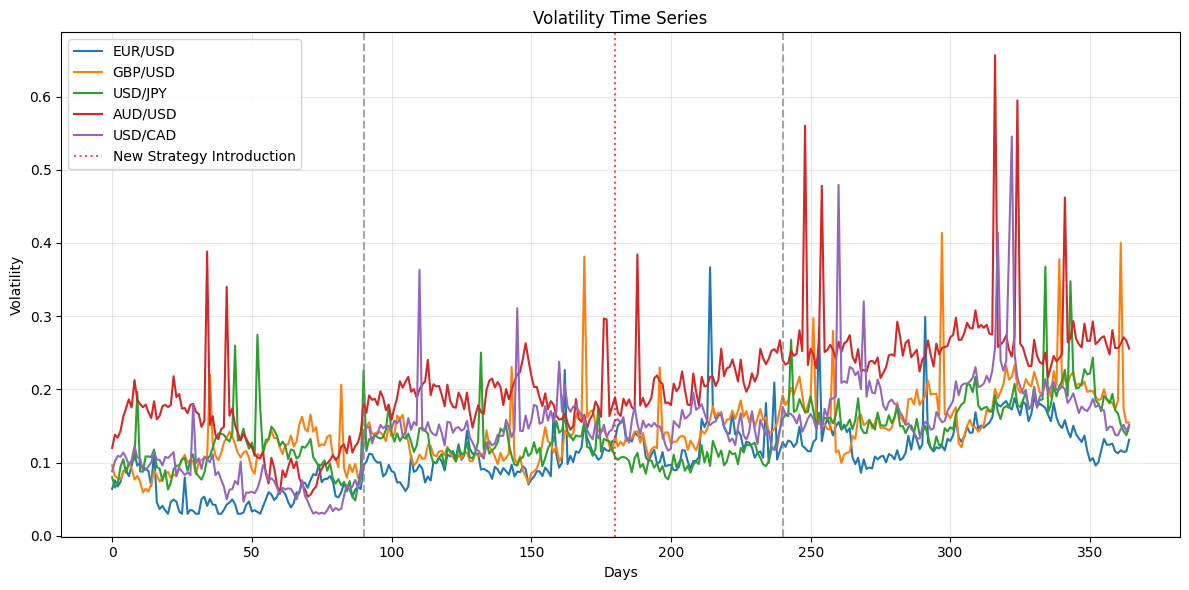

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(15, 10))
generator.plot_volatility_series()
plt.tight_layout()

<Figure size 1500x1500 with 0 Axes>

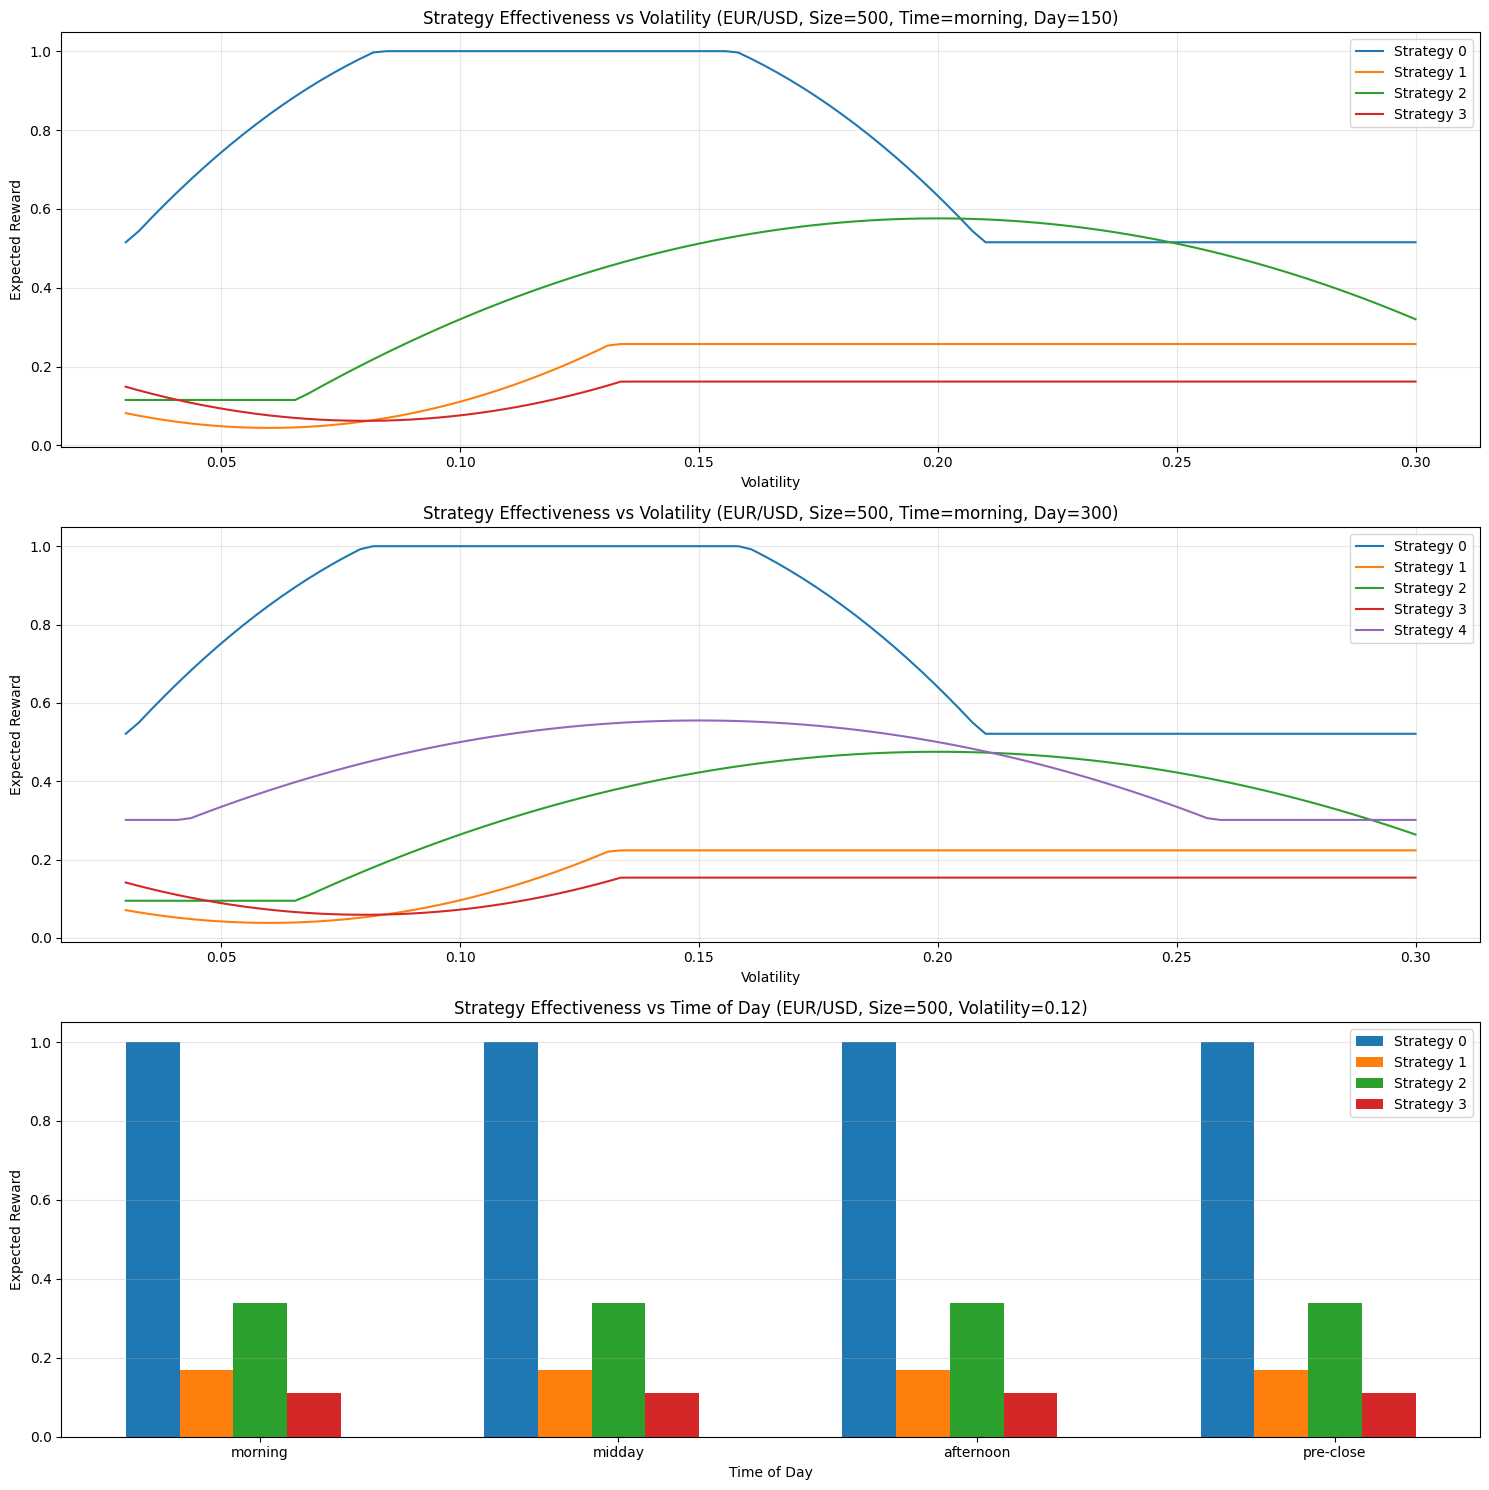

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(15, 15))
generator.plot_arm_effectiveness()
plt.tight_layout()

In [6]:
print("Sample data from the generated dataset:")
for i in range(3):
    print(f"\nContext {i+1}:")
    print(json.dumps(dataset[i], indent=2))

Sample data from the generated dataset:

Context 1:
{
  "context": {
    "currency_pair": "EUR/USD",
    "volatility": 0.064,
    "size": 780,
    "time_of_day": "pre-close",
    "date": "2023-01-01"
  },
  "rewards": {
    "0": 0.62784288,
    "1": 0.054429074195144575,
    "2": 0.17472610631638175,
    "3": 0.06858848175730572
  }
}

Context 2:
{
  "context": {
    "currency_pair": "USD/JPY",
    "volatility": 0.08,
    "size": 794,
    "time_of_day": "afternoon",
    "date": "2023-01-01"
  },
  "rewards": {
    "0": 0.5462912000000001,
    "1": 0.09921154320597739,
    "2": 0.31831919732548075,
    "3": 0.20748189387194144
  }
}

Context 3:
{
  "context": {
    "currency_pair": "EUR/USD",
    "volatility": 0.064,
    "size": 670,
    "time_of_day": "midday",
    "date": "2023-01-01"
  },
  "rewards": {
    "0": 0.67482432,
    "1": 0.05051587278242176,
    "2": 0.15808552476244062,
    "3": 0.075478648874478
  }
}


Volatility Summary Statistics:
          EUR/USD     GBP/USD     USD/JPY     AUD/USD     USD/CAD
count  365.000000  365.000000  365.000000  365.000000  365.000000
mean     0.107858    0.145145    0.135487    0.207684    0.147405
std      0.043645    0.047597    0.041794    0.070151    0.059679
min      0.030000    0.059149    0.048345    0.053370    0.030000
25%      0.081514    0.112027    0.106248    0.171502    0.116405
50%      0.107124    0.140675    0.129149    0.204748    0.149200
75%      0.132511    0.168901    0.159523    0.248764    0.173368
max      0.366671    0.413806    0.367674    0.656476    0.545535


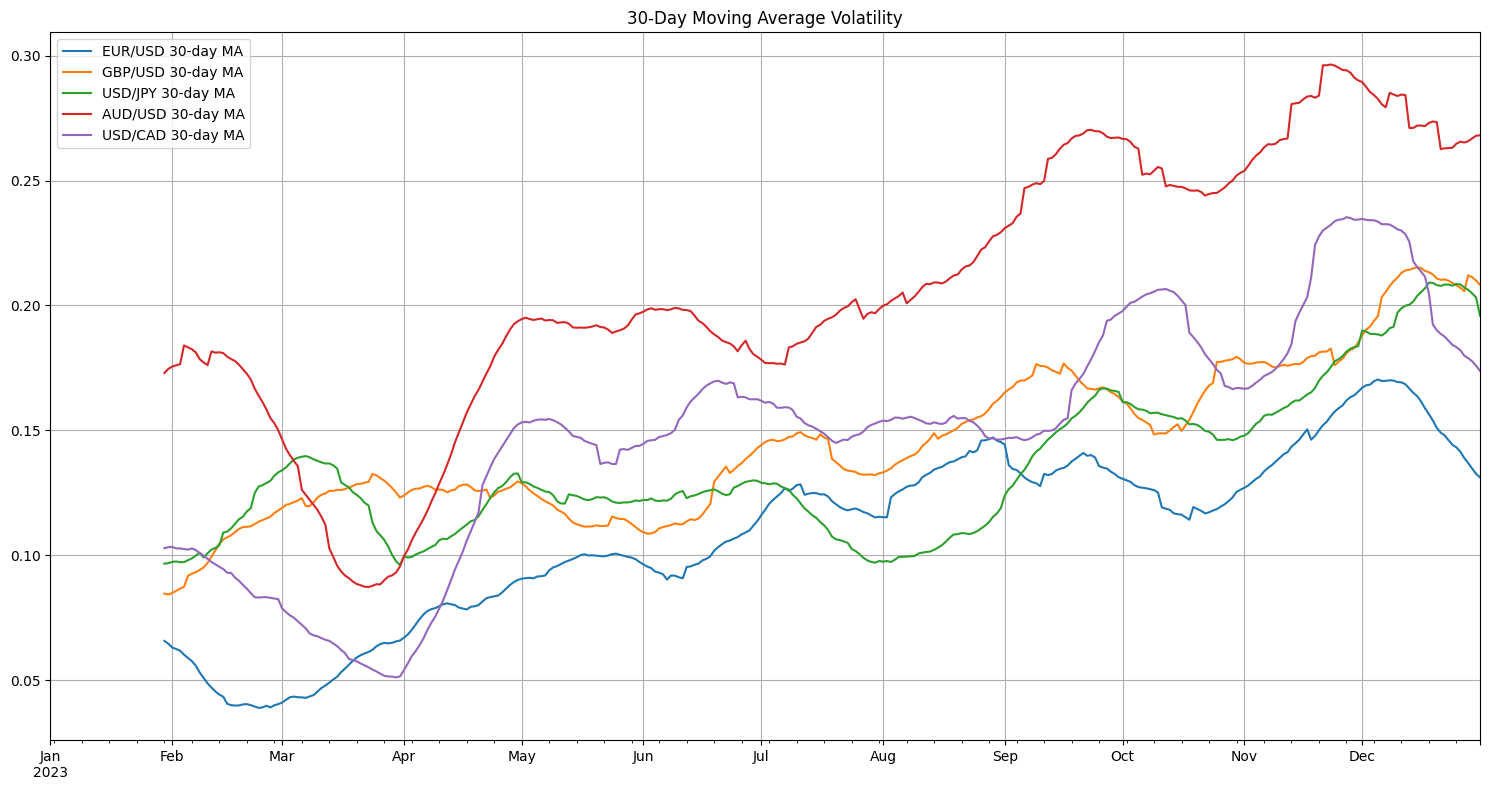

In [7]:
# Load volatility series
volatility_df = pd.read_csv("volatility_series.csv", index_col=0)
volatility_df.index = pd.to_datetime(volatility_df.index)

# Display summary statistics
print("Volatility Summary Statistics:")
print(volatility_df.describe())

# Plot rolling volatility averages
plt.figure(figsize=(15, 8))
for column in volatility_df.columns:
    volatility_df[column].rolling(window=30).mean().plot(label=f'{column} 30-day MA')
plt.title('30-Day Moving Average Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()

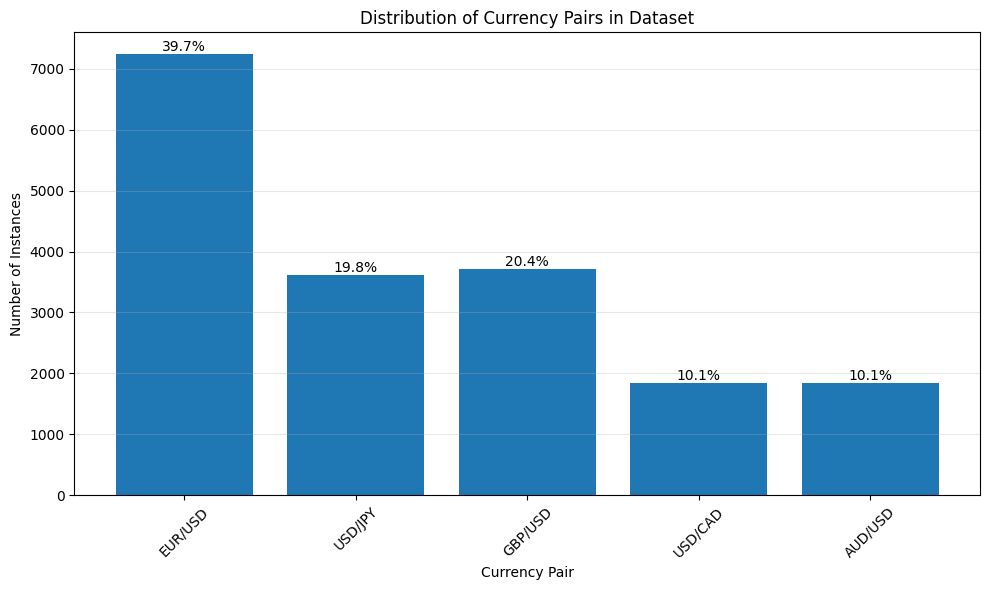

In [8]:
# Plot currency pair distribution in the dataset
generator.plot_currency_distribution(dataset)

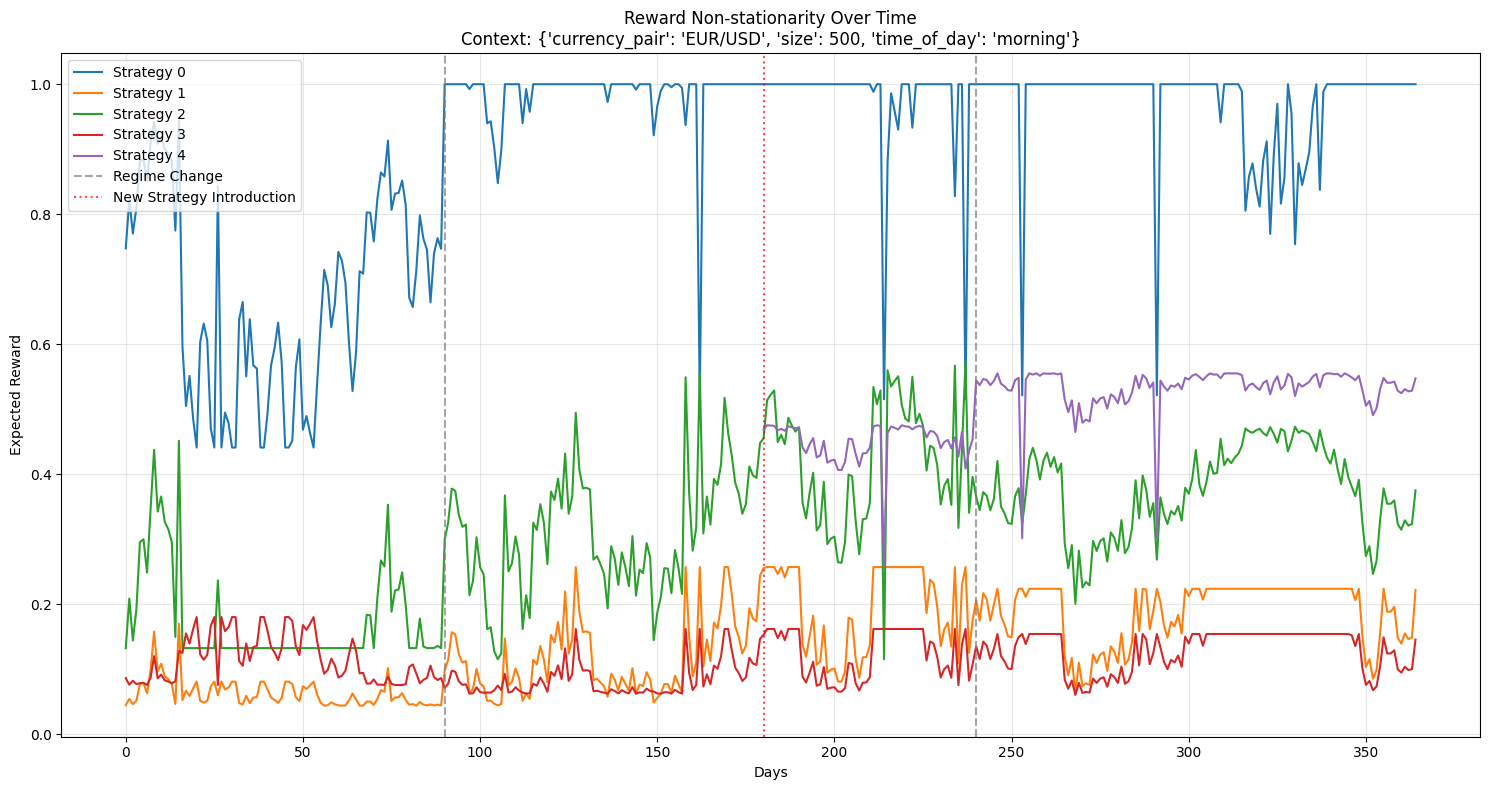

In [9]:
# Plot reward non-stationarity (with default context)
generator.plot_reward_nonstationarity()

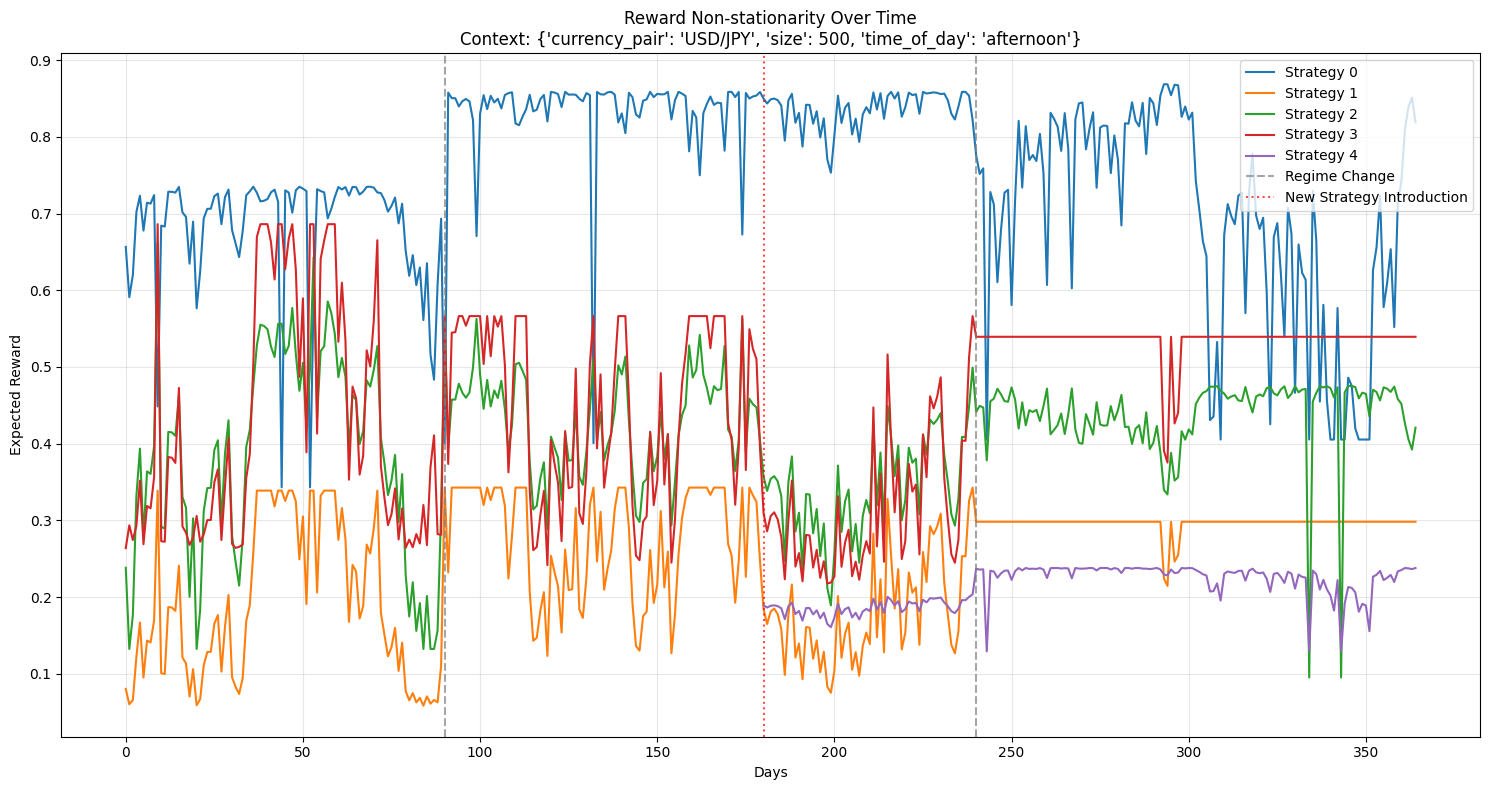

In [12]:
# Optional: Plot reward non-stationarity with a custom context
custom_context = {
    'currency_pair': 'USD/JPY',
    'size': 500,
    'time_of_day': 'afternoon'
}
generator.plot_reward_nonstationarity(fixed_context=custom_context)